# tsam - Segmentation
Example usage of the time series aggregation module (tsam)
Date: 24.10.2019

Author: Maximilian Hoffmann

Import pandas and the relevant time series aggregation class

In [1]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
%matplotlib inline

### Input data 

Read in time series from testdata.csv with pandas

In [2]:
raw = pd.read_csv('testdata.csv', index_col = 0)

Create a plot function for the temperature for a visual comparison of the time series

In [3]:
def plotTS(data, periodlength, vmin, vmax, label = 'T [°C]'):
    fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
    cax = axes.imshow(stacked.values.T, interpolation = 'nearest', vmin = vmin, vmax = vmax)
    axes.set_aspect('auto')  
    axes.set_ylabel('Hour')
    plt.xlabel('Day')

    fig.subplots_adjust(right = 1.2)
    cbar=plt.colorbar(cax)    
    cbar.set_label(label)

### Hierarchical aggregation with medoid representation and 10 typical days with 24 hourly segments

Initialize an aggregation class object with hierarchical as method for eight typical days

In [4]:
aggregation = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 10, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical')

Create the typical periods

In [5]:
typPeriods = aggregation.createTypicalPeriods()

Predict original data

In [6]:
predictedPeriods = aggregation.predictOriginalData()

Get accuracy indicators

In [7]:
aggregation.accuracyIndicators()

,RMSE,RMSE_duration,MAE
GHI,0.088539,0.020456,0.046153
Load,0.090037,0.018440,0.062417
T,0.086809,0.028643,0.067574
Wind,0.141886,0.054545,0.109904


### Hierarchical aggregation with medoid representation and 20 typical days with 12 irregular segments

In [8]:
aggregationSeg = tsam.TimeSeriesAggregation(raw, noTypicalPeriods = 20, hoursPerPeriod = 24, 
                                        clusterMethod = 'hierarchical', segmentation=True, noSegments=12)

Create the typical periods

In [9]:
typPeriodsSeg = aggregationSeg.createTypicalPeriods()

Predict original data

In [10]:
predictedPeriodsSeg = aggregationSeg.predictOriginalData()

Get accuracy indicators

In [11]:
aggregationSeg.accuracyIndicators()

,RMSE,RMSE_duration,MAE
GHI,0.084508,0.013653,0.043875
Load,0.078495,0.012815,0.056399
T,0.078610,0.019224,0.061182
Wind,0.132141,0.030489,0.101889


### Comparison of the aggregations 
It was shown for the temperature, but both times all four time series have been aggregated. Therefore, we compare here also the duration curves  of the electrical load for the original time series, the aggregation with k-mean, and the hierarchical aggregation including peak periods.

Text(0, 0.5, 'Duration Load [MW]')

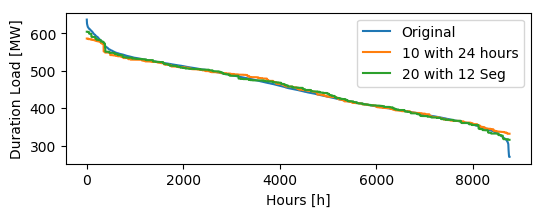

In [12]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = 'Original')
predictedPeriods['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = '10 with 24 hours')
predictedPeriodsSeg['Load'].sort_values(
    ascending=False).reset_index(drop=True).plot(label = '20 with 12 Seg')
plt.legend()
plt.xlabel('Hours [h]')
plt.ylabel('Duration Load [MW]')

In [13]:
param = 'GHI'

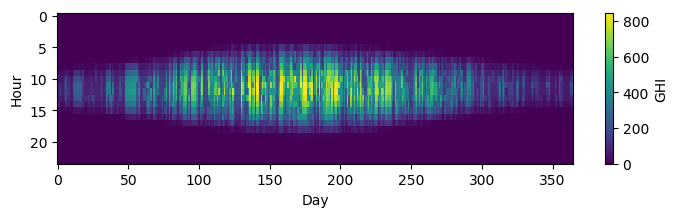

In [14]:
plotTS(raw[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

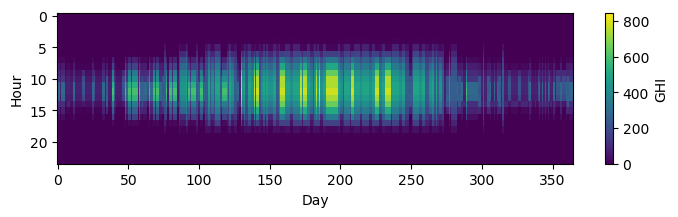

In [15]:
plotTS(predictedPeriods[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

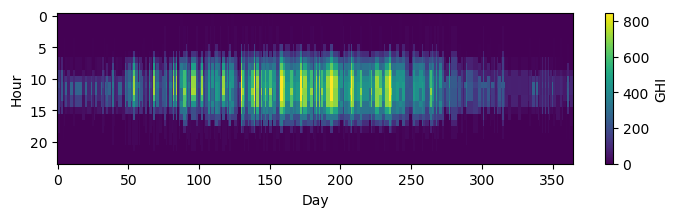

In [16]:
plotTS(predictedPeriodsSeg[param], 24, vmin = raw[param].min(), vmax = raw[param].max(), label = param)

Text(0, 0.5, 'Load [MW]')

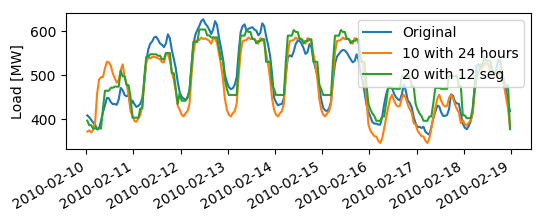

In [17]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['Load']['20100210':'20100218'].plot(label = 'Original')
predictedPeriods['Load']['20100210':'20100218'].plot(label = '10 with 24 hours')
predictedPeriodsSeg['Load']['20100210':'20100218'].plot(label = '20 with 12 seg')
plt.legend()
plt.ylabel('Load [MW]')

In [18]:
aggregation.clusterPeriodDict

{'GHI': {(0, 0): 0.0,
  (0, 1): 0.0,
  (0, 2): 0.0,
  (0, 3): 0.0,
  (0, 4): 0.0,
  (0, 5): 0.0,
  (0, 6): 0.0,
  (0, 7): 18.69588498778392,
  (0, 8): 63.78596054655691,
  (0, 9): 104.47700434349836,
  (0, 10): 134.17046873586108,
  (0, 11): 287.036822459506,
  (0, 12): 291.4358542213376,
  (0, 13): 269.44069541218,
  (0, 14): 115.47458374807714,
  (0, 15): 78.08281377250931,
  (0, 16): 32.99273821373633,
  (0, 17): 0.0,
  (0, 18): 0.0,
  (0, 19): 0.0,
  (0, 20): 0.0,
  (0, 21): 0.0,
  (0, 22): 0.0,
  (0, 23): 0.0,
  (1, 0): 0.0,
  (1, 1): 0.0,
  (1, 2): 0.0,
  (1, 3): 0.0,
  (1, 4): 0.0,
  (1, 5): 0.0,
  (1, 6): 6.598547642747266,
  (1, 7): 83.5816034747987,
  (1, 8): 173.76175459234466,
  (1, 9): 338.7254456610263,
  (1, 10): 413.508985612162,
  (1, 11): 537.7816328839021,
  (1, 12): 594.9690457877117,
  (1, 13): 549.8789702289388,
  (1, 14): 356.32157270835233,
  (1, 15): 256.2436001266855,
  (1, 16): 161.664417247308,
  (1, 17): 21.99515880915755,
  (1, 18): 0.0,
  (1, 19): 0.0,
  

In [19]:
aggregationSeg.indexMatching()

,PeriodNum,TimeStep,SegmentIndex
2009-12-31 23:30:00,2,0,0
2010-01-01 00:30:00,2,1,1
2010-01-01 01:30:00,2,2,2
2010-01-01 02:30:00,2,3,2
2010-01-01 03:30:00,2,4,3
2010-01-01 04:30:00,2,5,3
2010-01-01 05:30:00,2,6,3
2010-01-01 06:30:00,2,7,3
2010-01-01 07:30:00,2,8,3
2010-01-01 08:30:00,2,9,4
